In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
u = lambda x, t:np.sin(2*np.pi*(x + t))

def ndsolve_linear_convection(r, J, Tend, method):
    dx = 1.0 / J
    dt = r * dx
    x = np.linspace(0, 1, J + 1) # [0, 1]
    N = int(Tend / dt)
    v = np.zeros((N + 1, J + 1))
    v[0, :] = u(x, 0)
    infty_error = np.zeros(N + 1)
    infty_error[0] = 0
    if method == 'LF':
        for n in range(N):
            for j in range(1, J):
                v[n + 1, j] = (v[n, j+1] + v[n, j-1])/2 + r * (v[n, j + 1] - v[n, j - 1])/2
            v[n + 1, 0] = (v[n, 1] + v[n, J-1])/2 + r * (v[n, 1] - v[n, J - 1])/2
            v[n + 1, J] = v[n + 1, 0]  # periodic boundary condition
            infty_error[n + 1] = np.max(np.abs(v[n + 1, :] - u(x, (n + 1) * dt)))
    elif method == 'FTCS':
        for n in range(N):
            for j in range(1, J):
                v[n + 1, j] = v[n, j] + r * (v[n, j + 1] - v[n, j - 1])/2
            v[n + 1, 0] = v[n, 0] + r * (v[n, 1] - v[n, J - 1])/2
            v[n + 1, J] = v[n + 1, 0]
            infty_error[n + 1] = np.max(np.abs(v[n + 1, :] - u(x, (n + 1) * dt)))
    elif method == 'LW':
        for n in range(N):
            for j in range(1, J):
                v[n + 1, j] = v[n, j] + r * (v[n, j + 1] - v[n, j - 1])/2 + r**2 * (v[n, j + 1] - 2 * v[n, j] + v[n, j - 1])/2
            v[n + 1, 0] = v[n, 0] + r * (v[n, 1] - v[n, J - 1])/2 + r**2 * (v[n, 1] - 2 * v[n, 0] + v[n, J - 1])/2
            v[n + 1, J] = v[n + 1, 0]
            infty_error[n + 1] = np.max(np.abs(v[n + 1, :] - u(x, (n + 1) * dt)))
    else:
        raise ValueError("Unknown method: {}".format(method))
    return dt, x, v, infty_error

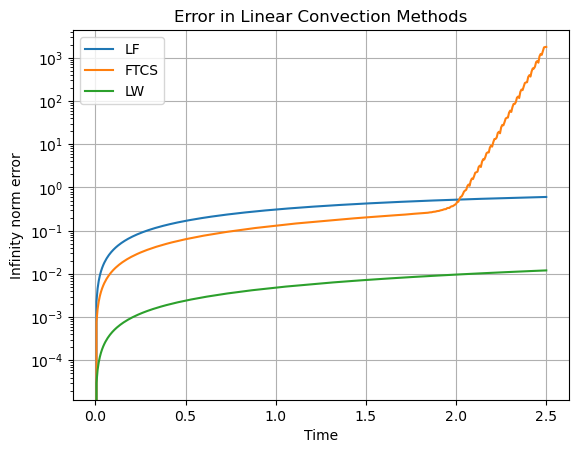

In [17]:
r = 0.5
J = 80
Tend = 2.5
dt, x, v, error_LF = ndsolve_linear_convection(r, J, Tend, 'LF')
dt, x, v, error_FTCS = ndsolve_linear_convection(r, J, Tend, 'FTCS')
dt, x, v, error_LW = ndsolve_linear_convection(r, J, Tend, 'LW')
t = np.linspace(0, Tend, len(error_LF))
plt.plot(t, error_LF, label='LF')
plt.plot(t, error_FTCS, label='FTCS')
plt.plot(t, error_LW, label='LW')
plt.yscale('log')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Infinity norm error')
plt.title('Error in Linear Convection Methods')
plt.grid()
plt.show()

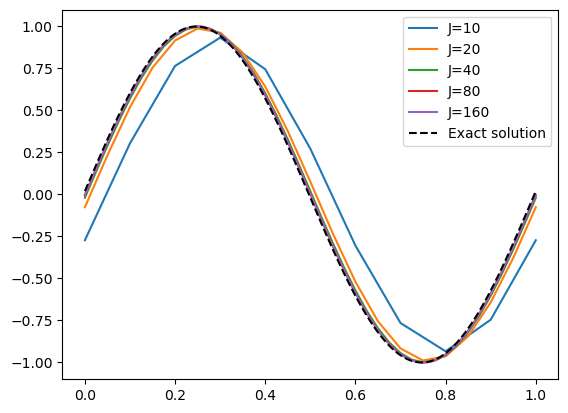

In [20]:
r= 0.5
Tend = 1.0
J = [10, 20, 40, 80, 160]
for j in J:
    dt, x, v, error_LW = ndsolve_linear_convection(r, j, Tend, 'LW')
    plt.plot(x, v[-1], label='J={}'.format(j))
plt.plot(x, u(x, dt*len(v[:,0])), 'k--', label='Exact solution')
plt.legend()